# **Regularization in Deep Learning**
Regularization is a crucial concept in deep learning that helps improve the generalization of models and prevent overfitting. Let's dive into what regularization is, why it’s important, and the common techniques used.

### What is Regularization?

Regularization is a set of techniques used to prevent a machine learning model from becoming too complex and overfitting to the training data. Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise or random fluctuations. This leads to poor performance on new, unseen data.

### Why is Regularization Important?

1. **Prevent Overfitting:** Regularization techniques introduce constraints or penalties that discourage the model from fitting the noise in the training data. This helps in creating a model that generalizes better to new data.

2. **Improve Model Generalization:** By controlling the model complexity, regularization helps in achieving a balance between fitting the training data and maintaining simplicity, which enhances the model’s performance on validation and test sets.

3. **Stabilize Learning:** Regularization can help stabilize the training process, especially when dealing with high-dimensional data or complex models.

### Common Regularization Techniques

Here are some popular regularization techniques used in deep learning:

#### 1. **L1 and L2 Regularization**

- **L1 Regularization (Lasso):**
  - **Definition:** Adds a penalty proportional to the absolute value of the weights.
  - **Formula:** \( \text{L1 penalty} = \lambda \sum_{i} |w_i| \)
  - **Effect:** Encourages sparsity in the weights, leading to some weights becoming exactly zero. This can be useful for feature selection.

- **L2 Regularization (Ridge):**
  - **Definition:** Adds a penalty proportional to the square of the weights.
  - **Formula:** \( \text{L2 penalty} = \lambda \sum_{i} w_i^2 \)
  - **Effect:** Encourages smaller weights and generally prevents any single weight from becoming too large, which can help in reducing overfitting.

- **When to Use:** L2 regularization is more commonly used than L1 in deep learning because it provides a smooth and continuous penalty. L1 can be used when feature selection is desired.

#### 2. **Dropout**

- **Definition:** Randomly "drops out" a proportion of neurons during training. This means that during each training iteration, a random subset of neurons is ignored, and their contributions are effectively zero.
- **Formula:** Not applicable as dropout is a probabilistic method rather than a formula.
- **Effect:** Prevents neurons from co-adapting too much, which improves the robustness and generalization of the network.

- **When to Use:** Dropout is widely used in deep neural networks, especially in fully connected layers. It is particularly useful for preventing overfitting in large models with many parameters.

#### 3. **Early Stopping**

- **Definition:** Monitors the model’s performance on a validation set and stops training when performance ceases to improve, thus preventing the model from overfitting.
- **Formula:** Not applicable as it’s a monitoring-based approach.
- **Effect:** Ensures that the model does not continue to train beyond the point where it starts to overfit to the training data.

- **When to Use:** Early stopping is commonly used in conjunction with other regularization techniques to halt training before overfitting becomes an issue.

#### 4. **Data Augmentation**

- **Definition:** Involves creating additional training samples by applying transformations (e.g., rotations, translations) to the existing data.
- **Effect:** Increases the diversity of the training set, which helps the model generalize better by exposing it to a wider range of variations.

- **When to Use:** Particularly useful in computer vision tasks where transformations such as flipping, rotating, or cropping images can provide more diverse training data.

#### 5. **Batch Normalization**

- **Definition:** Normalizes the output of each layer to have a mean of zero and a standard deviation of one before applying the activation function.
- **Effect:** Helps in stabilizing and accelerating the training process and can act as a regularizer by adding a small amount of noise to the learning process.

- **When to Use:** Frequently used in deep convolutional networks to improve training speed and performance.

### Which Regularization Technique to Use?

The choice of regularization technique depends on various factors, including the type of model, the size and nature of the data, and the specific problem being addressed. Here’s a brief guide:

- **For General Use:** **L2 regularization** is a good starting point and is often effective across a range of models.
- **For Feature Selection:** **L1 regularization** can be used to enforce sparsity in the model.
- **For Deep Networks:** **Dropout** is widely used to prevent overfitting, especially in large models.
- **For Training Stability:** **Batch Normalization** can be combined with other regularization techniques.
- **For Model Performance:** **Early stopping** and **data augmentation** are useful for improving generalization and model robustness.

In practice, a combination of these techniques is often employed to achieve the best results. For instance, you might use L2 regularization with dropout and batch normalization, along with early stopping and data augmentation as needed.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

In [76]:
X, y = make_moons(
    n_samples = 200,
    noise = 0.3,
    random_state = 42
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

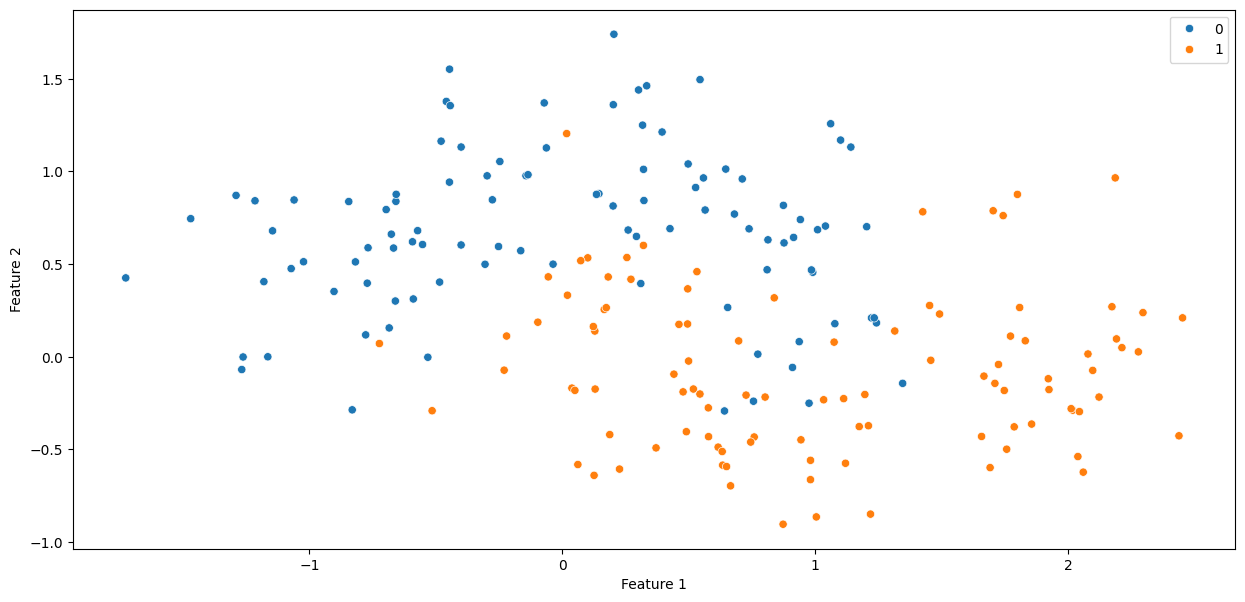

In [77]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## **MODEL WITHOUT REGULARIZATION**

In [80]:
model_1 = Sequential()

model_1.add(Input(shape = (X_train.shape[1],)))
model_1.add(Dense(units = 128, activation = 'relu'))
model_1.add(Dense(units = 128, activation = 'relu'))
model_1.add(Dense(units = 1, activation = 'sigmoid'))

model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
opt = keras.optimizers.Adam(learning_rate = 0.01)
model_1.compile(
    optimizer = opt,
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [82]:
history = model_1.fit(X_train, y_train, epochs = 2000, verbose = 0, validation_data = (X_test, y_test))

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step


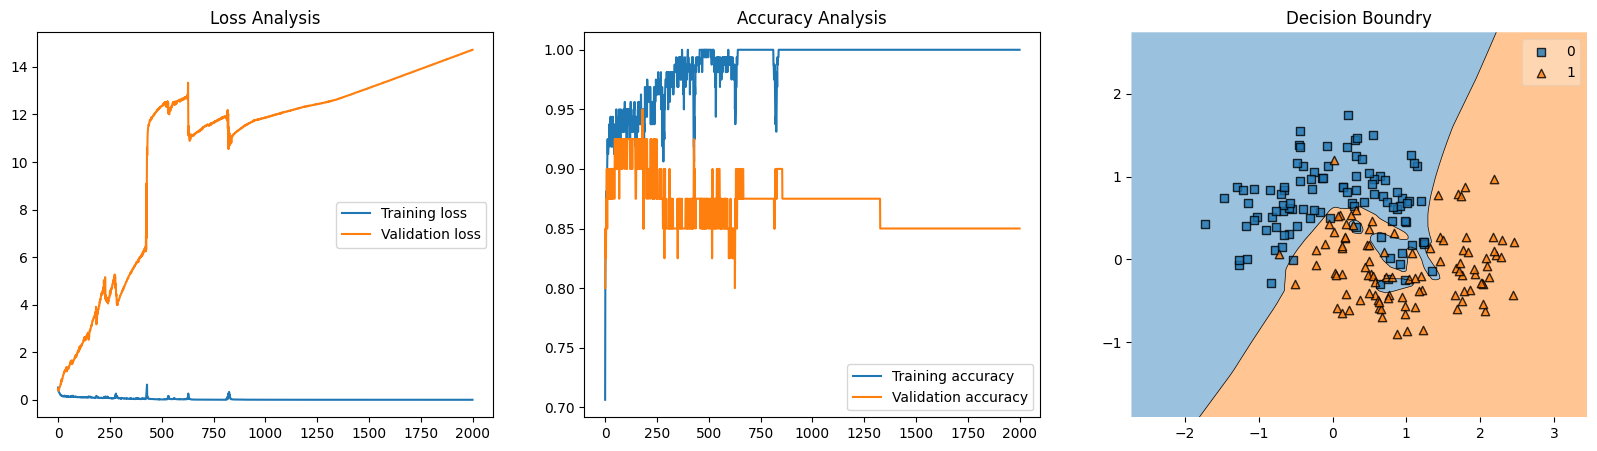

In [83]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

ax[0].plot(history.history['loss'], label = 'Training loss')
ax[0].plot(history.history['val_loss'], label = 'Validation loss')
ax[0].set_title('Loss Analysis')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label = 'Training accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'Validation accuracy')
ax[1].set_title('Accuracy Analysis')
ax[1].legend()

# Plotting Decision Boundry
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(
    X = X, y = y, clf = model_1, ax = ax[2]
)
ax[2].set_title('Decision Boundry')
fig.show()

> The decision boundary indicates that the model is overfitting to the dataset.

## **MODEL WITH REGULARIZATION**

- L1 Regularization: Use `keras.regularizers.l1(l1_value)` for L1 regularization.
- ElasticNet Regularization: Use `keras.regularizers.l1_l2(l1=l1_value, l2=l2_value)` to combine L1 and L2 penalties (ElasticNet).
You can pass these regularizers to the kernel_regularizer argument in layers like Dense or Conv2D

In [97]:
model_2 = Sequential()

model_2.add(Input(shape = (X_train.shape[1],)))
model_2.add(Dense(units = 128, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model_2.add(Dense(units = 128, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model_2.add(Dense(units = 1, activation = 'sigmoid'))

model_2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
opt = keras.optimizers.Adam(learning_rate = 0.01)
model_2.compile(
    optimizer = opt,
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [99]:
history_2 = model_2.fit(X_train, y_train, epochs = 2000, verbose = 0, validation_data = (X_test, y_test))

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step


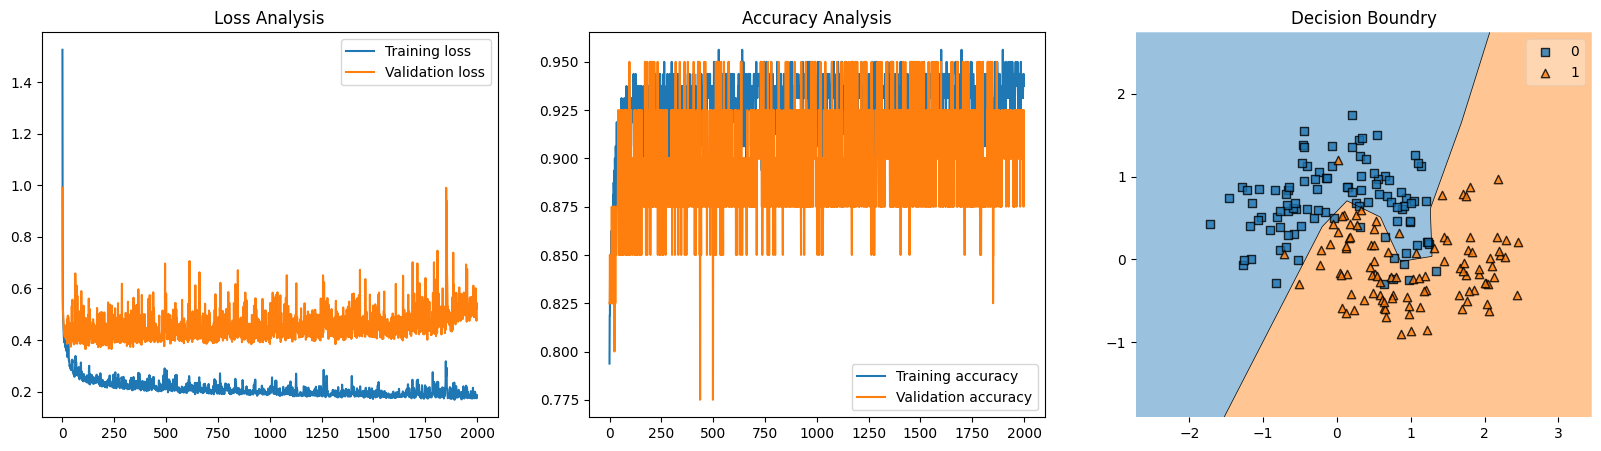

In [100]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

ax[0].plot(history_2.history['loss'], label = 'Training loss')
ax[0].plot(history_2.history['val_loss'], label = 'Validation loss')
ax[0].set_title('Loss Analysis')
ax[0].legend()

ax[1].plot(history_2.history['accuracy'], label = 'Training accuracy')
ax[1].plot(history_2.history['val_accuracy'], label = 'Validation accuracy')
ax[1].set_title('Accuracy Analysis')
ax[1].legend()

# Plotting Decision Boundry
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(
    X = X, y = y, clf = model_2, ax = ax[2]
)
ax[2].set_title('Decision Boundry')
fig.show()

> After applying L2 regularization, the model has become more generalized and is no longer overfitting the dataset.